Importar Bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


Carregar os Dados

In [2]:
# Carregar os dados do CSV
data = pd.read_csv('../data/creditcard.csv')

# Exibir as primeiras linhas do dataset
data.head()

# Verificar a estrutura do dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Análise Exploratória dos Dados (EDA)

In [3]:
# Estatísticas descritivas das variáveis
data.describe()

# Verificar a distribuição das classes
data['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

Limpeza dos Dados

In [4]:
# Verificar valores nulos
data.isnull().sum()

# Se houver valores nulos, podemos optar por preenchê-los ou removê-los
# Exemplo: data.dropna(inplace=True)

# Remover registros duplicados, se houver
data.drop_duplicates(inplace=True)


Normalização dos Dados

In [5]:
# Separar variáveis dependentes e independentes
X = data.drop(columns=['Class'])
y = data['Class']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Balanceamento das Classes

In [6]:
from imblearn.over_sampling import SMOTE

# Balancear o dataset usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verificar a nova distribuição das classes
pd.Series(y_resampled).value_counts()


Class
0    283253
1    283253
Name: count, dtype: int64

Divisão dos Dados

In [7]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Verificar a forma dos conjuntos de dados
X_train.shape, X_test.shape


((453204, 30), (113302, 30))

Visualização dos Dados

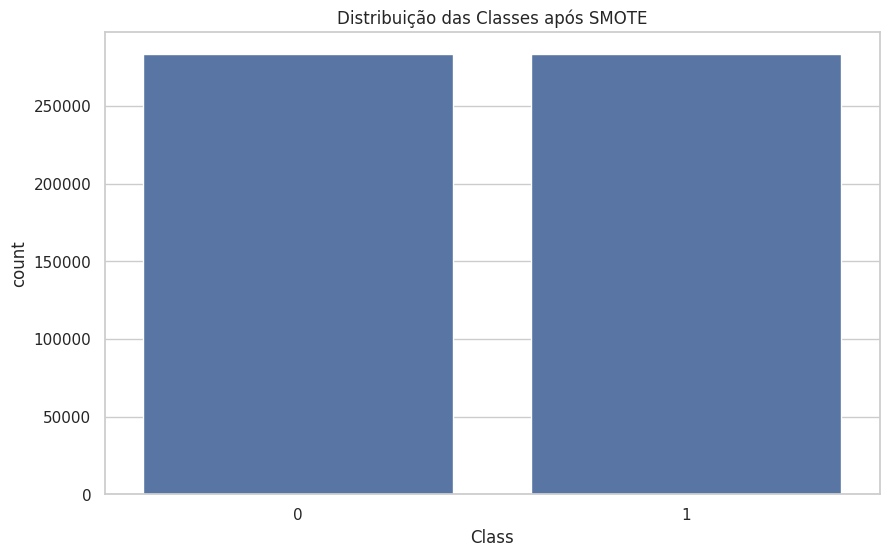

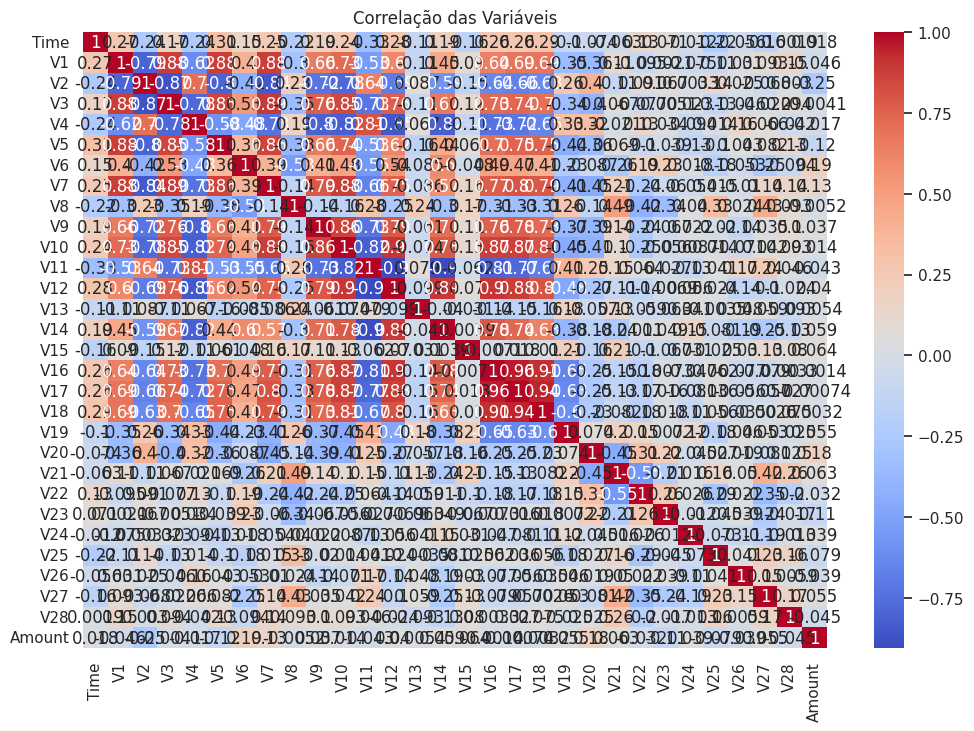

In [8]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled)
plt.title('Distribuição das Classes após SMOTE')
plt.show()

# Visualizar a correlação entre as variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_resampled, columns=data.columns[:-1]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis')
plt.show()
